#BigMart Sales Prediction problem

We have train (8523) data set which contains both input and output variable(s). We need to predict the sales for test data set.




* Item_Identifier: Unique product ID

* Item_Weight: Weight of product

* Item_Fat_Content: Whether the product is low fat or not

* Item_Visibility: The % of total display area of all products in a store allocated to the particular product

* Item_Type: The category to which the product belongs

* Item_MRP: Maximum Retail Price (list price) of the product

* Outlet_Identifier: Unique store ID

* Outlet_Establishment_Year: The year in which store was established

* Outlet_Size: The size of the store in terms of ground area covered

* Outlet_Location_Type: The type of city in which the store is located

* Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

#Importing libraries


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Reading Data & Understanding The Data

In [61]:
train = pd.read_csv('train_v9rqX0R.csv')

In [62]:
train_orignal = train.copy()

In [63]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [64]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [65]:
train.shape

(8523, 12)

In [66]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

There are 12 columns in the dataset.
We have 11 independent variables and 1 target variable(dependent) in  train dataset i.e Item_Outlet_Sales in the train dataset.

In [67]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [68]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [69]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**OBSERVATIONS**



1.   **Item_Visibility** has a min value of zero. This makes no practicle sense because when a product is being sold in a store, visibility cannot be zero.
2.   There are **1463** null values in **Item_Weight** and **2410** null values in **Outlet_Size**.
3. **Outlet_Establishment_Year** vary from 1985 to 2009.



In [70]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

**Modifying categories of Item_Fat_Content**


In [71]:
train['Item_Fat_Content']= train['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat' , 'reg':'Regular'})

In [72]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [73]:
train.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

**OBSERVATIONS**


1.   There are **1559 products** and **10 outlets/stores**.
2.   **Item_Type** has **16** unique values.



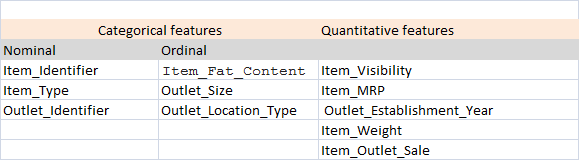

#Exploratory Data Analysis

## Univariate analysis

###Target variable.

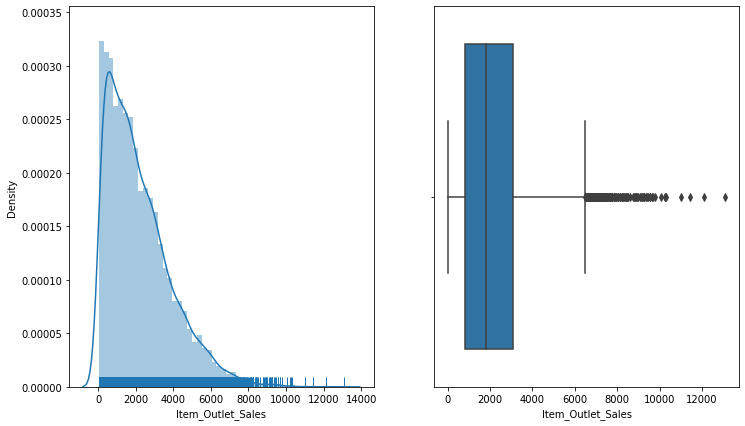

In [74]:
plt.figure(1, figsize=(12,7))

plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales'] , kde=True , rug = True)

plt.subplot(122)
sns.boxplot(train['Item_Outlet_Sales'])
plt.show()

**OBSERVATION:**

1. Item_Outlet_Sales is right skewed. Hence, the distribution is not normal. 
2. Box plot confirms the presence of outliers. 

Thus, we should use transformation to treat its skewness.


###Numerical features( independent)

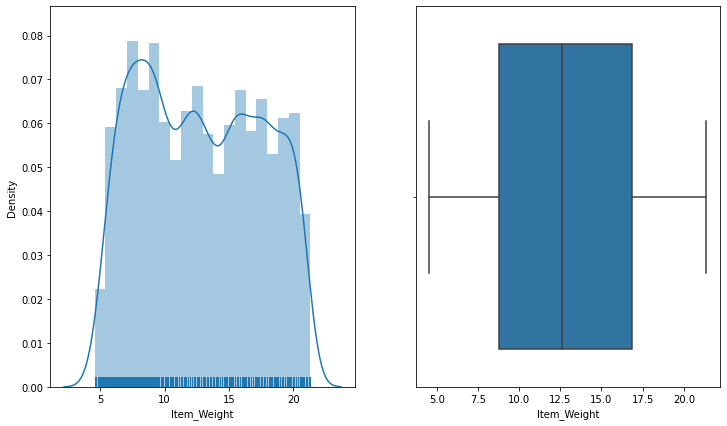

In [75]:
plt.figure(1, figsize=(12,7))

plt.subplot(121)
sns.distplot(train['Item_Weight'], rug = True)

plt.subplot(122)
sns.boxplot(train['Item_Weight'])
plt.show()

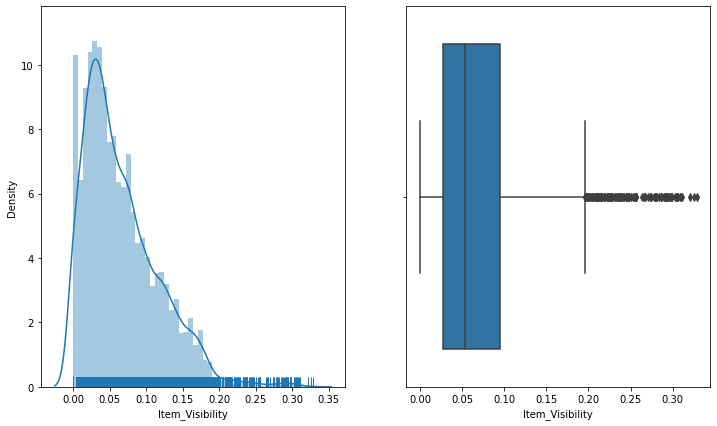

In [76]:
plt.figure(1, figsize=(12,7))

plt.subplot(121)
sns.distplot(train['Item_Visibility'] , kde=True , rug = True)

plt.subplot(122)
sns.boxplot(train['Item_Visibility'])
plt.show()

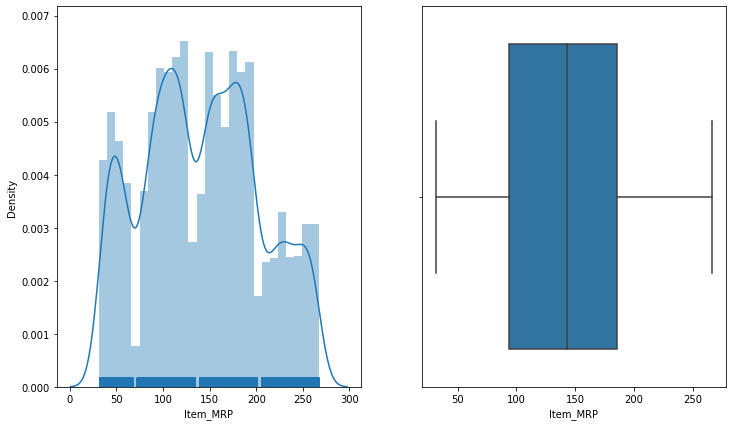

In [77]:

plt.figure(1, figsize=(12,7))

plt.subplot(121)
sns.distplot(train['Item_MRP'] , kde=True , rug = True)

plt.subplot(122)
sns.boxplot(train['Item_MRP'])
plt.show()

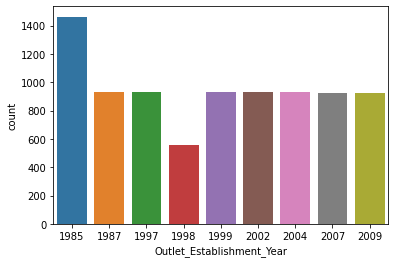

In [78]:
sns.countplot(train['Outlet_Establishment_Year']);

**OBSERVATIONS**

1. There is no clear pattern in Item_Weight.
2. Item_Visibility is right skewed. Box plot confirms presence of outliers.
3. We can see 4 different distribution in Item_MRP. It is an interesting insight.
4. Lesser number of observation in the data for the Outlet_Establishment_year in the year 1998 as compared to other other years.

###Categorical features( independent)

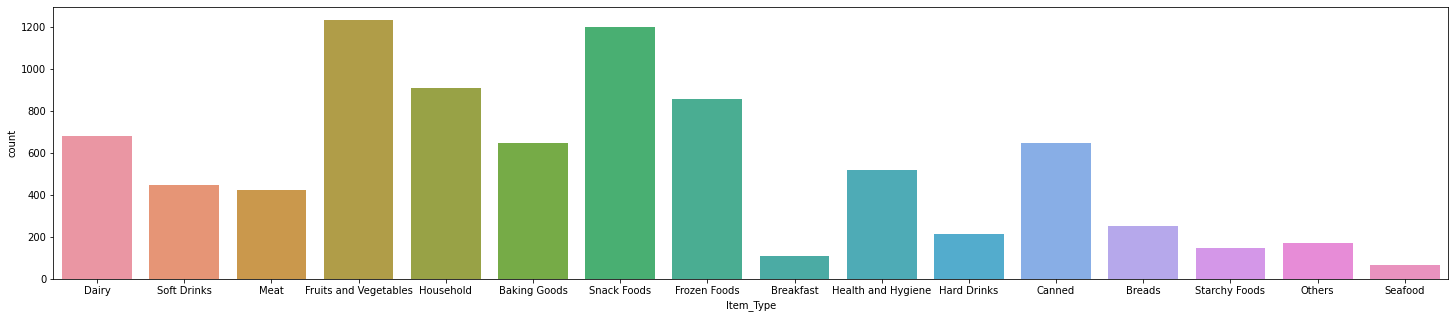

In [79]:
plt.figure(1, figsize=(25,5))
sns.countplot(train['Item_Type']);



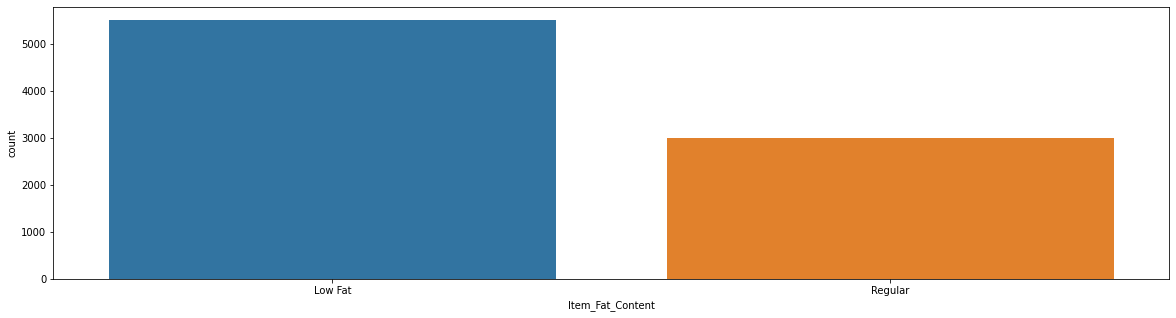

In [80]:
plt.figure(1,figsize=(20,5))
sns.countplot(train['Item_Fat_Content']);

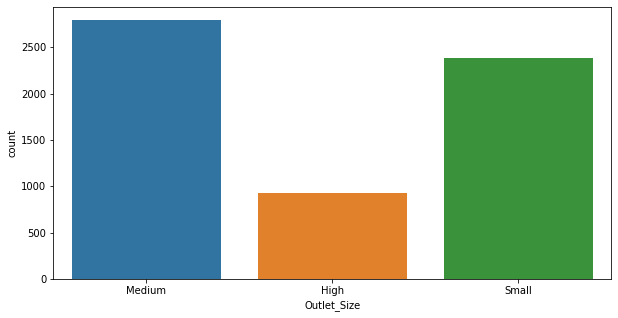

In [81]:
plt.figure(1,figsize=(10,5))
sns.countplot(train['Outlet_Size']);

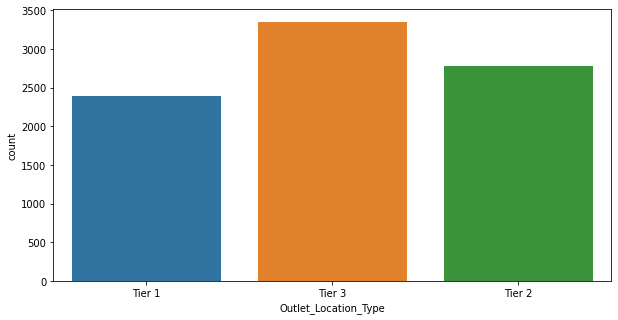

In [82]:
plt.figure(1,figsize=(10,5))
sns.countplot(train['Outlet_Location_Type']);

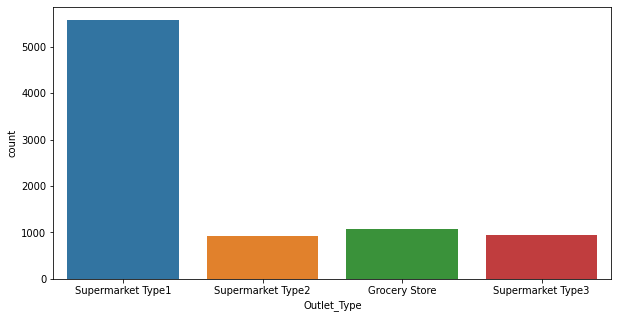

In [83]:
plt.figure(1,figsize=(10,5))
sns.countplot(train['Outlet_Type']);

**OBSERVATIONS**

1. Supermarket Type1 seems to be the most popular category of outlet type.
2. Most of the Outlets are of medium and small size.

##Bivariate analysis

### **1. Target variable vs Independent Numerical variables.**

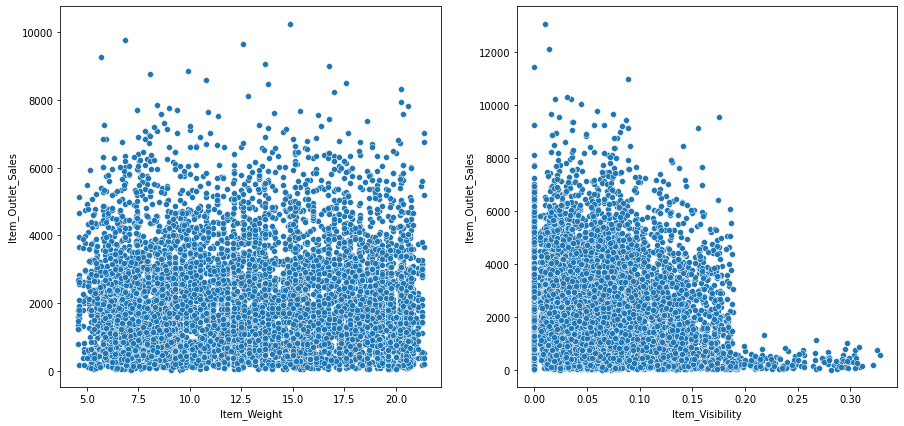

In [84]:
plt.figure(1, figsize=(15,7))
plt.subplot(121)
sns.scatterplot(x='Item_Weight' , y= 'Item_Outlet_Sales' , data= train)
plt.subplot(122)
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data = train)
plt.show()



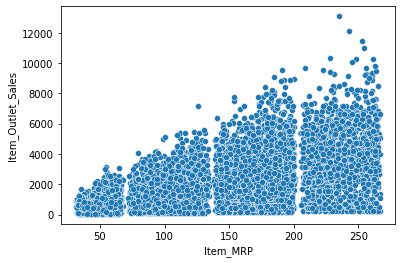

In [85]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train);

**OBSERVATIONS**

1. Item_Outlet_Sales are spread well across the entire range of the Item_Weight without any obvious pattern.
2. In Item_Visibility vs Item_Outlet_Sales there is a string of points with item visibility 0.0 which is strange as item visibility cannot be zero. 
3. In the Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices.

###**2. Target variable vs Categorical variables( independent)**

In [86]:
train.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

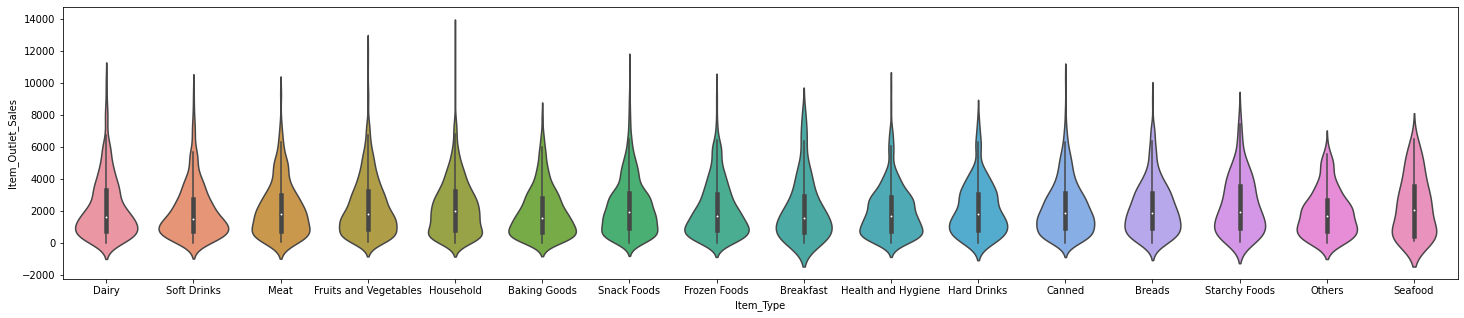

In [87]:
plt.figure(1, figsize=(25,5))
sns.violinplot( x='Item_Type' , y= 'Item_Outlet_Sales' , data= train);

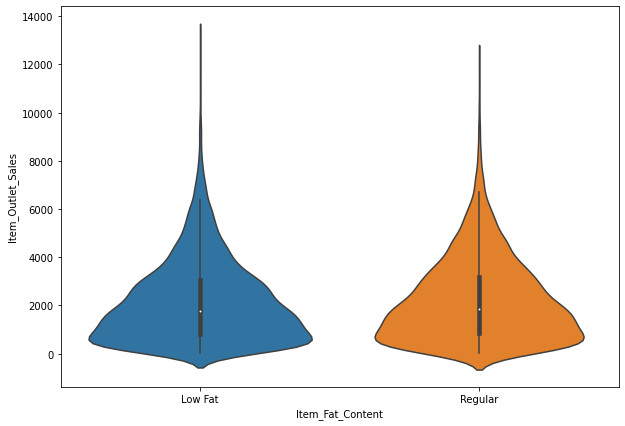

In [88]:
plt.figure(1 , figsize=(10,7))
sns.violinplot( x='Item_Fat_Content' , y= 'Item_Outlet_Sales' , data= train);

**The distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.**


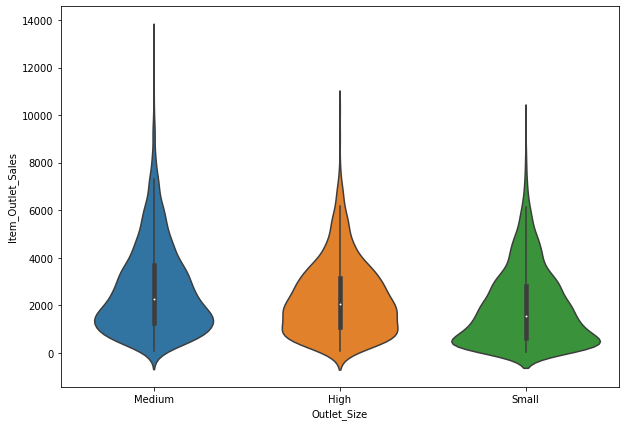

In [89]:
plt.figure(1 , figsize=(10,7))
sns.violinplot( x='Outlet_Size' , y= 'Item_Outlet_Sales' , data= train);

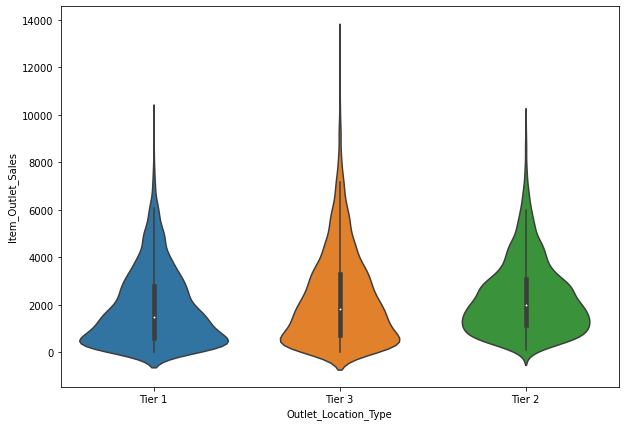

In [90]:
plt.figure(1 , figsize=(10,7))
sns.violinplot( x='Outlet_Location_Type' , y= 'Item_Outlet_Sales' , data= train);

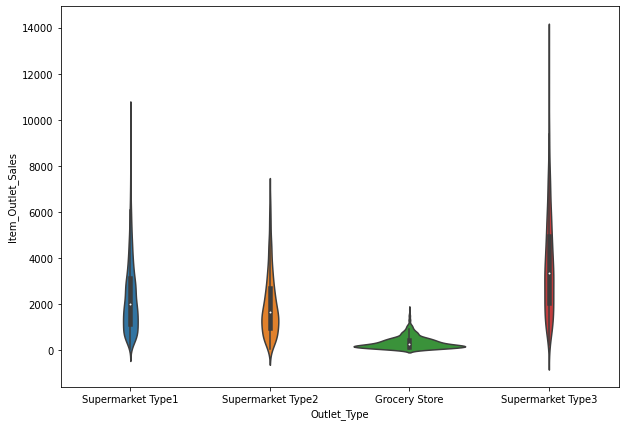

In [91]:
plt.figure(1 , figsize=(10,7))
sns.violinplot( x='Outlet_Type' , y= 'Item_Outlet_Sales' , data= train);

**OBSERVATION**

1. Grocery store has most of its data points around the lower sales value.
2. In Outlet_Location_Type vs Item_Outlet_Sales Tier 1 and Tier 3 location type are similar.
3. There is no significant relation between Outlet size and Item_Outlet_sales.

# Missing value treatment

We have seen missing values in Item weight and Item Outlet Sale.       
We will now impute missing values in Item weight using mean weight based on Item Identifier.

In [92]:
Item_Avg_Weight = train.pivot_table(values='Item_Weight' , index='Item_Identifier')
Item_Avg_Weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [93]:
missing_values = train['Item_Weight'].isnull()

In [94]:
for i, item in enumerate(train['Item_Identifier']):
    if missing_values[i]:
        if item in Item_Avg_Weight:
            train['Item_Weight'][i] = Item_Avg_Weight.loc[item]['Item_Weight']
        else:
            train['Item_Weight'][i] = np.mean(train['Item_Weight'])

In [95]:
train['Item_Weight'].isnull().sum()

0

In [96]:
Outlet_size_mode = train.pivot_table(values= 'Outlet_Size' , columns='Outlet_Type' , aggfunc= (lambda x: x.mode()[0]))
Outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [97]:
missing_value = train['Outlet_Size'].isnull()
train.loc[missing_value, 'Outlet_Size']= train.loc[missing_value, 'Outlet_Type'].apply(lambda x: Outlet_size_mode[x])

In [98]:
train['Outlet_Size'].isnull().sum()

0

In [99]:
sum(train['Item_Visibility']==0)

526

In [100]:
# replace 0 with mean
train.loc[: , 'Item_Visibility'].replace([0], [train['Item_Visibility'].mean()], inplace= True)

In [101]:
sum(train['Item_Visibility']==0)

0

#Feature Engineering

We will create following new features:


1.   Item_Type_New : Broader categories of the variable Item_Type.
2.   Outlet_years : Years of operation for Outlet.



In [102]:
#Get the first two characters of ID
train['Item_Type_new'] = train['Item_Identifier'].apply( lambda x: x[0:2])

#Renaming them to more intiutive categories
train['Item_Type_new'] = train['Item_Type_new'].map({'FD':'Food','NC':'Non-consumable' , 'DR':'Drinks'})

In [103]:
train['Item_Type_new'].value_counts()

Food              6125
Non-consumable    1599
Drinks             799
Name: Item_Type_new, dtype: int64

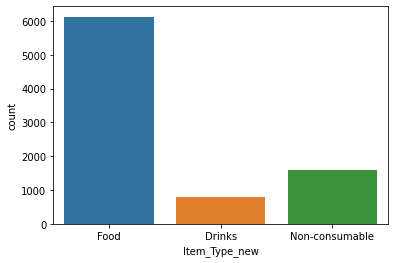

In [104]:
sns.countplot(train['Item_Type_new']);

In [105]:
#Outlet_years
train['Outlet_Years'] = 2009- train['Outlet_Establishment_Year']

In [106]:
train['Outlet_Years'].describe()

count    8523.000000
mean       11.168133
std         8.371760
min         0.000000
25%         5.000000
50%        10.000000
75%        22.000000
max        24.000000
Name: Outlet_Years, dtype: float64

#Correlation matrix

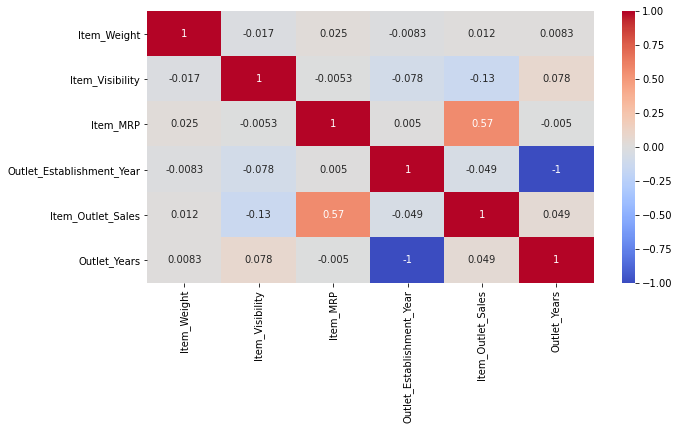

In [107]:
matrix= train.corr()
plt.figure(1, figsize=(10,5))
sns.heatmap( matrix, annot = True , cmap= 'coolwarm');

Most correlated variable is:


1.   Item_MRP vs Item_Outlet_Sales




In [108]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,10
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,11
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-consumable,22


#Label Encoding

In [109]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
train['Outlet']= le.fit_transform(train['Item_Identifier'])


In [110]:
categorical_col= ['Item_Fat_Content','Item_Type','Outlet_Size', 'Outlet_Location_Type','Outlet_Type','Item_Type_new']
for col in categorical_col:
    train[col] =le.fit_transform(train[col])

#Onehot Encoding

In [111]:
train= pd.get_dummies(train , columns= ['Item_Fat_Content','Outlet_Size', 'Outlet_Location_Type','Outlet_Type','Item_Type_new'])

In [112]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_new_0,Item_Type_new_1,Item_Type_new_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,10,156,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,0,8,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,10,662,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,732.3800,11,1121,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,994.7052,22,1297,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


# Input split

In [113]:
x= train.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'])
y = train['Item_Outlet_Sales']

In [114]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train,y_test =train_test_split(x,y , test_size= 0.30, random_state= 42)

#Model Training

In [120]:

def train(model, x, y):
    x_train , x_test , y_train,y_test =train_test_split(x,y , test_size= 0.3, random_state= 42)
    # train the model
    model.fit(x_train, y_train)

    #predict the training set
    pred = model.predict(x_test)
    
    #MSE
    MSE= np.mean((pred - y_test)**2)

   
    print('Model Report')
    print("MSE:",MSE)
    print('Rsquare=', model.score(x_test,y_test))
   


In [121]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
model= LinearRegression(normalize= True)
train(model,x,y)


Model Report
MSE: 1207421.9742314785
Rsquare= 0.5689308231394292


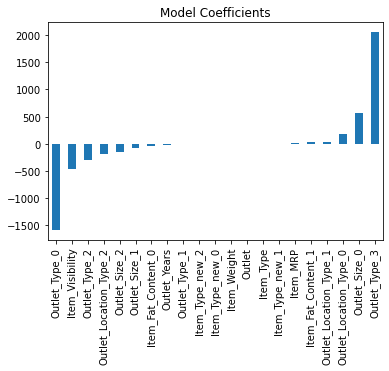

In [117]:
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")


Model Report
MSE: 1532626.3107107026
Rsquare= 0.4528276142949698


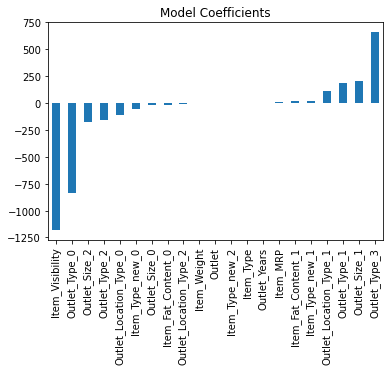

In [118]:
model = Ridge(normalize=True)
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1207817.9822138064
Rsquare= 0.5687894418836507


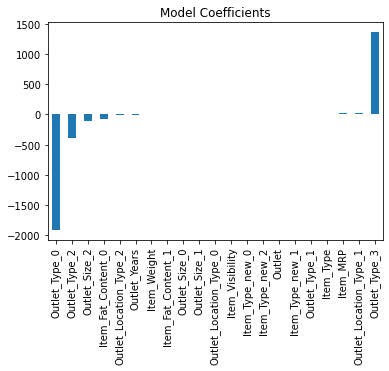

In [119]:
model = Lasso()
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients");